In [1901]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale as dt
from ydata_profiling import ProfileReport as pr
import sweetviz as sv
import plotly.express as px 
import arabic_reshaper
from bidi.algorithm import get_display
from matplotlib import rcParams
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [890]:
#Read in the csv file and convert to a Pandas dataframe

In [891]:
aqar_df = pd.read_csv("Riyadh_Aqqar_felal.csv")

In [1956]:
#svreport = sv.analyze(aqar_df_cleaned)
#svreport.show_html("sweetviz_report.html")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [893]:
aqar_df.head()

نوع العقار   المدينة         الحي الواجهة عدد الغرف عدد الصالات  \
0       فيلا   الرياض    حي العارض   جنوبية         6           3   
1       فيلا   الرياض    حي العارض   جنوبية         6           4   
2       فيلا   الرياض    حي العارض   جنوبية         3           2   
3       فيلا   الرياض    حي النرجس   جنوبية         4           4   
4       فيلا   الرياض    حي العارض    غربية         4           1   

  عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  غرفة خادمة  غرفة سائق  \
0           5+         NaN    244.0         1     1           1          1   
1           5+         NaN    322.0         1     1           1          1   
2           5+         NaN    350.0         1     0           1          0   
3            4         NaN    350.0         1     1           1          0   
4           5+         NaN    270.0         1     1           1          1   

   ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  السعر الاجمالي  
0     0    1     0    0           1     1         2300000  
1     1    1     0    0           1     1         3000000  
2     1    0     0    1           1     1         2600000  
3     0    1     0    1           1     1         2600000  
4     0    0     0    0           1     0         2800000

In [1207]:
aqar_df.shape

(993, 21)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [1205]:
profile =pr(aqar_df_cleaned, title ='aqar')
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [897]:
aqar_df.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'عرض الشارع', 'المساحة', 'درج صالة', 'مطبخ',
       'غرفة خادمة', 'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة',
       'مصعد', 'السعر الاجمالي'],
      dtype='object')

In [898]:
aqar_df.head()

نوع العقار   المدينة         الحي الواجهة عدد الغرف عدد الصالات  \
0       فيلا   الرياض    حي العارض   جنوبية         6           3   
1       فيلا   الرياض    حي العارض   جنوبية         6           4   
2       فيلا   الرياض    حي العارض   جنوبية         3           2   
3       فيلا   الرياض    حي النرجس   جنوبية         4           4   
4       فيلا   الرياض    حي العارض    غربية         4           1   

  عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  غرفة خادمة  غرفة سائق  \
0           5+         NaN    244.0         1     1           1          1   
1           5+         NaN    322.0         1     1           1          1   
2           5+         NaN    350.0         1     0           1          0   
3            4         NaN    350.0         1     1           1          0   
4           5+         NaN    270.0         1     1           1          1   

   ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  السعر الاجمالي  
0     0    1     0    0           1     1         2300000  
1     1    1     0    0           1     1         3000000  
2     1    0     0    1           1     1         2600000  
3     0    1     0    1           1     1         2600000  
4     0    0     0    0           1     0         2800000

In [899]:
aqar_df.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف          object
عدد الصالات        object
عدد الحمامات       object
عرض الشارع        float64
المساحة           float64
درج صالة            int64
مطبخ                int64
غرفة خادمة          int64
غرفة سائق           int64
ملحق                int64
حوش                 int64
مسبح                int64
قبو                 int64
مدخل سيارة          int64
مصعد                int64
السعر الاجمالي      int64
dtype: object

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
# The data is reliabile its from aqar 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# its 2023 its not up-to-date

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [ ]:
# the data is consistent

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [ ]:
# All the columns is relevant

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [907]:
aqar_df.duplicated().sum()

136

In [908]:
aqar_df[aqar_df.duplicated()]

نوع العقار              المدينة            الحي       الواجهة عدد الغرف  \
709        فيلا              الرياض     حي المونسية         جنوبية         6   
711        فيلا              الرياض       حي الرمال          غربية        7+   
716        فيلا              الرياض     حي المونسية          شرقية         5   
717        فيلا              الرياض      حي الحمراء          شرقية        7+   
718        فيلا            حي قرطبة    شارع جبل مره         جنوبية        7+   
...         ...                  ...             ...           ...       ...   
1048       فيلا              الرياض     حي المونسية   شمالية غربية         5   
1061       فيلا              الرياض     حي المونسية            NaN       NaN   
1062       فيلا   امارة منطقة الرياض         الرياض          شرقية         5   
1078       فيلا   امارة منطقة الرياض         الرياض          غربية         5   
1083       فيلا               الرياض         الرياض         جنوبية         5   

     عدد الصالات عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  \
709            4           5+         NaN    262.0         1     1   
711            3           5+        18.0    300.0         1     1   
716            3            4         NaN    308.0         1     0   
717            2           5+         NaN    618.0         1     1   
718            3           5+         NaN    450.0         0     1   
...          ...          ...         ...      ...       ...   ...   
1048           2           5+        15.0    440.0         1     1   
1061         NaN          NaN         NaN      NaN         0     0   
1062           3           5+         NaN    375.0         1     1   
1078           1           5+        18.0    250.0         1     1   
1083           2           5+        15.0    300.0         1     1   

      غرفة خادمة  غرفة سائق  ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  \
709            1          1     0    1     0    0           1     0   
711            1          0     0    1     0    0           1     0   
716            1          0     1    1     0    0           1     1   
717            1          1     1    1     1    0           1     1   
718            1          1     0    1     0    0           1     0   
...          ...        ...   ...  ...   ...  ...         ...   ...   
1048           1          0     0    0     0    0           0     0   
1061           0          0     0    0     0    0           0     0   
1062           1          0     1    1     0    0           1     1   
1078           1          0     0    0     0    0           0     0   
1083           1          0     1    0     0    0           1     0   

      السعر الاجمالي  
709          2000000  
711          1500000  
716          2650000  
717          4500000  
718          2600000  
...              ...  
1048         3250000  
1061         2300000  
1062         3650000  
1078         1450000  
1083         1400000  

[136 rows x 20 columns]

In [909]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [911]:
#Display number missing values per column

In [912]:
aqar_df.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة            31
عدد الغرف          97
عدد الصالات       123
عدد الحمامات       97
عرض الشارع        625
المساحة            31
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [913]:
aqar_df[aqar_df['الواجهة'].isnull()]

نوع العقار              المدينة                الحي الواجهة عدد الغرف  \
724        فيلا              الرياض           حي المنار      NaN       NaN   
730        فيلا              الرياض          حي الفيحاء      NaN       NaN   
737        فيلا              الرياض           حي الندوة      NaN       NaN   
741        فيلا              الرياض          حي الفيحاء      NaN       NaN   
743        فيلا              الرياض           حي الروضة      NaN       NaN   
745        فيلا              الرياض           حي الرمال      NaN       NaN   
749        فيلا              الرياض         حي المونسية      NaN       NaN   
750        فيلا              الرياض          حي الفيحاء      NaN       NaN   
756        فيلا              الرياض          حي اشبيلية      NaN       NaN   
765        فيلا   امارة منطقة الرياض             الرياض      NaN       NaN   
775        فيلا              الرياض           حي الرمال      NaN       NaN   
782        فيلا              الرياض         حي المعيزلة      NaN       NaN   
785        فيلا              الرياض          حي السعادة      NaN       NaN   
809        فيلا              الرياض            حي قرطبة      NaN       NaN   
817        فيلا              الرياض          حي السعادة      NaN       NaN   
823        فيلا              الرياض         حي القادسية      NaN       NaN   
824        فيلا              الرياض       حي الملك فيصل      NaN       NaN   
838        فيلا              الرياض          حي اشبيلية      NaN       NaN   
869        فيلا              الرياض           حي النهضة      NaN       NaN   
882        فيلا              الرياض           حي الرمال      NaN       NaN   
929        فيلا              الرياض       حي الملك فيصل      NaN       NaN   
934        فيلا   امارة منطقة الرياض             الرياض      NaN       NaN   
965        فيلا   امارة منطقة الرياض             الرياض      NaN       NaN   
985        فيلا              الرياض            حي الملز      NaN       NaN   
993        فيلا              الرياض    حي النسيم الشرقي      NaN       NaN   
1028       فيلا              الرياض          حي اليرموك      NaN       NaN   
1037       فيلا              الرياض           حي الرمال      NaN       NaN   
1050       فيلا              الرياض         حي المونسية      NaN       NaN   
1055       فيلا              الرياض         حي المونسية      NaN       NaN   
1061       فيلا              الرياض         حي المونسية      NaN       NaN   
1068       فيلا              الرياض          حي اليرموك      NaN       NaN   

     عدد الصالات عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  \
724          NaN          NaN         NaN      NaN         0     0   
730          NaN          NaN         NaN      NaN         0     0   
737          NaN          NaN         NaN      NaN         0     0   
741          NaN          NaN         NaN      NaN         0     0   
743          NaN          NaN         NaN      NaN         0     0   
745          NaN          NaN         NaN      NaN         0     0   
749          NaN          NaN         NaN      NaN         0     0   
750          NaN          NaN         NaN      NaN         0     0   
756          NaN          NaN         NaN      NaN         0     0   
765          NaN          NaN         NaN      NaN         0     0   
775          NaN          NaN         NaN      NaN         0     0   
782          NaN          NaN         NaN      NaN         0     0   
785          NaN          NaN         NaN      NaN         0     0   
809          NaN          NaN         NaN      NaN         0     0   
817          NaN          NaN         NaN      NaN         0     0   
823          NaN          NaN         NaN      NaN         0     0   
824          NaN          NaN         NaN      NaN         0     0   
838          NaN          NaN         NaN      NaN         0     0   
869          NaN          NaN         NaN      NaN         0     0   
882          NaN          NaN         NaN      NaN         0     0   
929          NaN          NaN         

In [914]:
aqar_df[aqar_df['عدد الغرف'].isnull()]

نوع العقار              المدينة                   الحي الواجهة عدد الغرف  \
713        فيلا   امارة منطقة الرياض                الرياض   جنوبية       NaN   
714        فيلا              الرياض              حي الرمال   شمالية       NaN   
720        فيلا              الرياض              حي الرمال   جنوبية       NaN   
721        فيلا   امارة منطقة الرياض                الرياض    غربية       NaN   
723        فيلا   امارة منطقة الرياض                الرياض    شرقية       NaN   
...         ...                  ...                    ...     ...       ...   
1068       فيلا              الرياض             حي اليرموك      NaN       NaN   
1074       فيلا              الرياض               حي الشرق   شمالية       NaN   
1075       فيلا              الرياض    حي الملك عبد العزيز    شرقية       NaN   
1081       فيلا              الرياض             حي اليرموك    شرقية       NaN   
1086       فيلا   امارة منطقة الرياض                الرياض   جنوبية       NaN   

     عدد الصالات عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  \
713          NaN          NaN         NaN    321.0         0     0   
714          NaN          NaN         NaN    281.0         0     0   
720          NaN          NaN         NaN    355.0         0     0   
721          NaN          NaN         NaN    363.0         0     0   
723          NaN          NaN         NaN    495.0         0     0   
...          ...          ...         ...      ...       ...   ...   
1068         NaN          NaN         NaN      NaN         0     0   
1074         NaN          NaN         NaN    281.0         0     0   
1075         NaN          NaN         NaN    350.0         0     0   
1081         NaN          NaN         NaN    300.0         0     0   
1086         NaN          NaN         NaN    320.0         0     0   

      غرفة خادمة  غرفة سائق  ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  \
713            0          0     0    0     0    0           0     0   
714            0          0     0    0     0    0           0     0   
720            0          0     0    0     0    0           0     0   
721            0          0     0    0     0    0           0     0   
723            0          0     0    0     0    0           0     0   
...          ...        ...   ...  ...   ...  ...         ...   ...   
1068           0          0     0    0     0    0           0     0   
1074           0          0     0    0     0    0           0     0   
1075           0          0     0    0     0    0           0     0   
1081           0          0     0    0     0    0           0     0   
1086           0          0     0    0     0    0           0     0   

      السعر الاجمالي  
713          3150000  
714          1400000  
720          2400000  
721          1700000  
723          3500000  
...              ...  
1068         2250000  
1074         1400000  
1075         3000000  
1081         2250000  
1086         1550000  

[97 rows x 20 columns]

In [915]:
aqar_df[aqar_df['عدد الصالات'].isnull()]

نوع العقار              المدينة                   الحي       الواجهة  \
69         فيلا              الرياض            حي الياسمين         جنوبية   
175        فيلا              الدرعية               العيينة     ثلاث شوارع   
215        فيلا              الرياض              حي الملقا         شمالية   
280        فيلا              الرياض          حي الملك فيصل   شمالية شرقية   
283        فيلا              الرياض              حي النظيم         جنوبية   
...         ...                  ...                    ...           ...   
1068       فيلا              الرياض             حي اليرموك            NaN   
1074       فيلا              الرياض               حي الشرق         شمالية   
1075       فيلا              الرياض    حي الملك عبد العزيز          شرقية   
1081       فيلا              الرياض             حي اليرموك          شرقية   
1086       فيلا   امارة منطقة الرياض                الرياض         جنوبية   

     عدد الغرف عدد الصالات عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  \
69           5         NaN            2         NaN    375.0         1     0   
175         7+         NaN            4         NaN    565.0         1     1   
215          6         NaN           5+         5.0    360.0         0     1   
280         7+         NaN            1         NaN    875.0         1     0   
283          1         NaN            3         NaN    500.0         0     1   
...        ...         ...          ...         ...      ...       ...   ...   
1068       NaN         NaN          NaN         NaN      NaN         0     0   
1074       NaN         NaN          NaN         NaN    281.0         0     0   
1075       NaN         NaN          NaN         NaN    350.0         0     0   
1081       NaN         NaN          NaN         NaN    300.0         0     0   
1086       NaN         NaN          NaN         NaN    320.0         0     0   

      غرفة خادمة  غرفة سائق  ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  \
69             1          1     0    0     0    0           0     0   
175            0          1     1    0     0    0           1     0   
215            0          0     0    0     0    0           0     0   
280            0          0     0    0     0    0           0     0   
283            0          0     0    0     0    0           0     0   
...          ...        ...   ...  ...   ...  ...         ...   ...   
1068           0          0     0    0     0    0           0     0   
1074           0          0     0    0     0    0           0     0   
1075           0          0     0    0     0    0           0     0   
1081           0          0     0    0     0    0           0     0   
1086           0          0     0    0     0    0           0     0   

      السعر الاجمالي  
69           4600000  
175          2000000  
215          4700000  
280          4500000  
283          1550000  
...              ...  
1068         2250000  
1074         1400000  
1075         3000000  
1081         2250000  
1086         1550000  

[123 rows x 20 columns]

In [916]:
aqar_df[aqar_df['عرض الشارع'].isnull()]

نوع العقار              المدينة                الحي       الواجهة  \
0          فيلا              الرياض           حي العارض         جنوبية   
1          فيلا              الرياض           حي العارض         جنوبية   
2          فيلا              الرياض           حي العارض         جنوبية   
3          فيلا              الرياض           حي النرجس         جنوبية   
4          فيلا              الرياض           حي العارض          غربية   
...         ...                  ...                 ...           ...   
1085       فيلا              الرياض         حي الازدهار   جنوبية شرقية   
1086       فيلا   امارة منطقة الرياض             الرياض         جنوبية   
1087       فيلا              الرياض    حي النسيم الغربي          شرقية   
1088       فيلا              الرياض          حي الاندلس          شرقية   
1089       فيلا              الرياض            حي القدس         جنوبية   

     عدد الغرف عدد الصالات عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  \
0            6           3           5+         NaN    244.0         1     1   
1            6           4           5+         NaN    322.0         1     1   
2            3           2           5+         NaN    350.0         1     0   
3            4           4            4         NaN    350.0         1     1   
4            4           1           5+         NaN    270.0         1     1   
...        ...         ...          ...         ...      ...       ...   ...   
1085        7+           5           5+         NaN    720.0         1     1   
1086       NaN         NaN          NaN         NaN    320.0         0     0   
1087         4           1            3         NaN    450.0         0     0   
1088         5           1           5+         NaN    632.0         0     1   
1089         5           2           5+         NaN    435.0         0     1   

      غرفة خادمة  غرفة سائق  ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  \
0              1          1     0    1     0    0           1     1   
1              1          1     1    1     0    0           1     1   
2              1          0     1    0     0    1           1     1   
3              1          0     0    1     0    1           1     1   
4              1          1     0    0     0    0           1     0   
...          ...        ...   ...  ...   ...  ...         ...   ...   
1085           1          1     1    1     0    1           1     0   
1086           0          0     0    0     0    0           0     0   
1087           0          0     0    1     0    0           1     0   
1088           1          0     1    1     0    0           1     0   
1089           1          0     1    1     0    0           1     0   

      السعر الاجمالي  
0            2300000  
1            3000000  
2            2600000  
3            2600000  
4            2800000  
...              ...  
1085         3900000  
1086         1550000  
1087         1500000  
1088         2400000  
1089         2500000  

[625 rows x 20 columns]

In [917]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [919]:
# check columns types 

In [1954]:
aqar_df.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف           int64
عدد الصالات         int64
عدد الحمامات        int64
عرض الشارع        float64
المساحة           float64
درج صالة            int64
مطبخ                int64
غرفة خادمة          int64
غرفة سائق           int64
ملحق                int64
حوش                 int64
مسبح                int64
قبو                 int64
مدخل سيارة          int64
مصعد                int64
السعر الاجمالي      int64
المنطقة            object
dtype: object

In [921]:
# go to clean them 

In [922]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [924]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [925]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [926]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [930]:
# 'نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
     #  'عدد الحمامات', 'عرض الشارع', 'المساحة', 'درج صالة', 'مطبخ',
      # 'غرفة خادمة', 'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة',
       #'مصعد', 'السعر الاجمالي'],

In [931]:
aqar_df.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'عرض الشارع', 'المساحة', 'درج صالة', 'مطبخ',
       'غرفة خادمة', 'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة',
       'مصعد', 'السعر الاجمالي'],
      dtype='object')

In [932]:
aqar_df = aqar_df.dropna(subset=['الواجهة'])

In [933]:
aqar_df = aqar_df.dropna(subset=['عدد الغرف'])

In [934]:
aqar_df['عدد الصالات'].fillna('0', inplace=True)

C:\Users\Firas\AppData\Local\Temp\ipykernel_28324\390110166.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [935]:
aqar_df['عرض الشارع'].fillna(0.0, inplace=True)

C:\Users\Firas\AppData\Local\Temp\ipykernel_28324\1192517119.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [936]:
aqar_df.isnull().sum()

نوع العقار        0
المدينة           0
الحي              0
الواجهة           0
عدد الغرف         0
عدد الصالات       0
عدد الحمامات      0
عرض الشارع        0
المساحة           0
درج صالة          0
مطبخ              0
غرفة خادمة        0
غرفة سائق         0
ملحق              0
حوش               0
مسبح              0
قبو               0
مدخل سيارة        0
مصعد              0
السعر الاجمالي    0
dtype: int64

In [937]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [939]:
aqar_df.head()

نوع العقار   المدينة         الحي الواجهة عدد الغرف عدد الصالات  \
0       فيلا   الرياض    حي العارض   جنوبية         6           3   
1       فيلا   الرياض    حي العارض   جنوبية         6           4   
2       فيلا   الرياض    حي العارض   جنوبية         3           2   
3       فيلا   الرياض    حي النرجس   جنوبية         4           4   
4       فيلا   الرياض    حي العارض    غربية         4           1   

  عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  غرفة خادمة  غرفة سائق  \
0           5+         0.0    244.0         1     1           1          1   
1           5+         0.0    322.0         1     1           1          1   
2           5+         0.0    350.0         1     0           1          0   
3            4         0.0    350.0         1     1           1          0   
4           5+         0.0    270.0         1     1           1          1   

   ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  السعر الاجمالي  
0     0    1     0    0           1     1         2300000  
1     1    1     0    0           1     1         3000000  
2     1    0     0    1           1     1         2600000  
3     0    1     0    1           1     1         2600000  
4     0    0     0    0           1     0         2800000

In [940]:
#y = lambda x : x.split('+')[0]
#y('7+')

In [941]:
aqar_df['عدد الحمامات'] = aqar_df['عدد الحمامات'].map(lambda x : int(x.split('+')[0]))

In [942]:
aqar_df['عدد الصالات'] = aqar_df['عدد الصالات'].map(lambda x : int(x.split('+')[0]))

In [943]:
aqar_df['عدد الغرف'] = aqar_df['عدد الغرف'].map(lambda x : int(x.split('+')[0]))

In [944]:
aqar_df.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف           int64
عدد الصالات         int64
عدد الحمامات        int64
عرض الشارع        float64
المساحة           float64
درج صالة            int64
مطبخ                int64
غرفة خادمة          int64
غرفة سائق           int64
ملحق                int64
حوش                 int64
مسبح                int64
قبو                 int64
مدخل سيارة          int64
مصعد                int64
السعر الاجمالي      int64
dtype: object

In [945]:
aqar_df['الحي']

0               حي العارض 
1               حي العارض 
2               حي العارض 
3               حي النرجس 
4               حي العارض 
               ...        
1084            حي النهضة 
1085          حي الازدهار 
1087     حي النسيم الغربي 
1088           حي الاندلس 
1089             حي القدس 
Name: الحي, Length: 993, dtype: object

In [1067]:
aqar_df['المدينة'].unique()

array(['الرياض', 'الدرعية', 'حريملاء'], dtype=object)

In [1079]:
aqar_df['الحي'].unique()

array(['حي العارض', 'حي النرجس', 'حي الملقا', 'حي النخيل', 'حي التعاون',
       'حي الوادي', 'غير معروف', 'حي جامعة الملك سعود', 'حي الربيع',
       'العيينة', 'حي العقيق', 'حي الياسمين', 'حي العليا', 'حي النزهة',
       'حي القيروان', 'حي النفل', 'حي الفلاح', 'القرينه', 'حي الرحمانية',
       'حي المصيف', 'حي الندى', 'حي الصحافة', 'حي المحمدية', 'حي المروج',
       'حي حطين', 'حي الملك فهد', 'حي الملقا7541', 'حي صلاح الدين',
       'حي المونسية', 'حي القدس', 'حي الخليج', 'حي الرمال',
       'حي النسيم الغربي', 'حي الريان', 'حي الروضة', 'حي الحمراء',
       'حي النسيم الشرقي', 'حي اشبيلية', 'حي النهضة', 'حي القادسية',
       'حي قرطبة', 'حي اليرموك', 'حي الملك فيصل', 'حي الصفا', 'حي النظيم',
       'حي البيان', 'حي السعادة', 'حي الاندلس', 'حي الجنادرية',
       'حي الازدهار', 'حي غرناطة', 'حي المعيزلة', 'حي الفيحاء',
       'حي مطار الملك خالد الدولي', 'حي الملز', 'حي السلام', 'حي الشهداء',
       'حي الروابي', 'حي المنار', 'حي ظهرة لبن', 'حي المهدية',
       'حي العريجاء الغربي', 'حي 

In [1075]:
aqar_df[aqar_df['الحي'] =='']

Empty DataFrame
Columns: [نوع العقار, المدينة, الحي, الواجهة, عدد الغرف, عدد الصالات, عدد الحمامات, عرض الشارع, المساحة, درج صالة, مطبخ, غرفة خادمة, غرفة سائق, ملحق, حوش, مسبح, قبو, مدخل سيارة, مصعد, السعر الاجمالي]
Index: []

In [1081]:
aqar_df[aqar_df['الحي'] ==  ' الرياض ']

Empty DataFrame
Columns: [نوع العقار, المدينة, الحي, الواجهة, عدد الغرف, عدد الصالات, عدد الحمامات, عرض الشارع, المساحة, درج صالة, مطبخ, غرفة خادمة, غرفة سائق, ملحق, حوش, مسبح, قبو, مدخل سيارة, مصعد, السعر الاجمالي]
Index: []

In [1073]:
aqar_df['الحي'] = aqar_df['الحي'].replace('', 'غير معروف')

In [951]:
aqar_df['الحي'] = aqar_df['الحي'].replace(' الرياض ', 'غير معروف ')

In [952]:
aqar_df['المدينة'] = aqar_df['المدينة'].replace(' امارة منطقة الرياض', 'الرياض')

In [953]:
aqar_df['المدينة'].replace(' حي قرطبة ', 'الرياض', inplace=True)

C:\Users\Firas\AppData\Local\Temp\ipykernel_28324\3921502133.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [954]:
aqar_df['الحي'].replace(' شارع جبل مره ', ' حي قرطبة ', inplace=True)

C:\Users\Firas\AppData\Local\Temp\ipykernel_28324\2065436656.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [955]:
aqar_df['المدينة'].replace(' حي الازدهار ', 'الرياض', inplace=True)

C:\Users\Firas\AppData\Local\Temp\ipykernel_28324\996186731.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [956]:
aqar_df['الحي'].replace(' شارع ابراهيم القيسي ', 'حي الازدهار', inplace=True)

C:\Users\Firas\AppData\Local\Temp\ipykernel_28324\1534130311.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [957]:
aqar_df['المدينة'] = aqar_df['المدينة'].replace(' حي العريجاء الغربية ', 'الرياض ')

In [958]:
aqar_df['الحي'] = aqar_df['الحي'].replace(' طريق الامير مساعد بن عبدالرحمن بن فيصل ', 'حي العريجاء الغربية ')

In [959]:
aqar_df['المدينة'].replace(' حي النخيل ', 'الرياض', inplace=True) 

C:\Users\Firas\AppData\Local\Temp\ipykernel_28324\2085525551.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [962]:
aqar_df['المدينة'].replace(' حي النخيل ', 'الرياض', inplace=True) 

C:\Users\Firas\AppData\Local\Temp\ipykernel_28324\2085525551.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [963]:
aqar_df['الحي'] = aqar_df['الحي'].replace( ' شارع سعيد السلمي ','حي النخيل ' )

In [966]:
aqar_df['الحي'] = aqar_df['الحي'].str.strip()

In [967]:
aqar_df['المدينة'] = aqar_df['المدينة'].str.strip()

In [1085]:
north = ['حي النرجس', 'حي الملقا',
         'حي النخيل', 'حي العقيق', 'حي الياسمين', 'حي النفل',
         'حي الفلاح', 'حي الندى', 'حي الصحافة', 
         'حي المحمدية', 'حي العارض',
         'حي التعاون', 'حي الوادي',
         'حي الربيع', 'العيينة', 
         'حي النزهة', 'حي القيروان', 
         'حي المصيف', 'حي الرحمانية', ]         

In [1121]:
south = ['حي الندوة', 'حي المعيزيلة', 'حي الفاروق',
         'حي الخالدية', 'حي الزهراء', 'حي المناخ',
         'حي احد', 'حي الاسكان', 'حي الدار البيضاء', 'حي العزيزية']
         

In [1937]:
west = ['حي الشفا', 'حي طيبة', 'حي السويدي الغربي' , 'حي لبن', 'حي العريجاء الوسطى', 
        'حي العريجاء الغربية', 'حي الحزم', 'حي هجرة لبن', 
        'حي الرفيعة', 'حي العوالي', 'حي العريجاء الغربي', 
        'حي طويق', 'حي ظهرة البديعة', 'حي نمار', 
        'حي ظهرة لبن', 'حي المهدية']

In [1941]:
aqar_df.loc[aqar_df['الحي'].isin(south), 'المنطقة'] = 'جنوب الرياض'

In [1939]:
aqar_df.loc[aqar_df['الحي'].isin(west), 'المنطقة'] = 'غرب الرياض'

In [1115]:
aqar_df['المنطقة'] = aqar_df['الحي'].apply(lambda x: 'شمال الرياض' if x in north else 'شرق الرياض')

In [1147]:
aqar_df.loc[aqar_df['الحي'] == 'غير معروف', 'المنطقة'] = 'غير معروف'

In [1149]:
aqar_df[aqar_df['الحي'] == 'غير معروف']

نوع العقار المدينة       الحي الواجهة  عدد الغرف  عدد الصالات  \
19         فيلا  الرياض  غير معروف  شمالية          5            3   
20         فيلا  الرياض  غير معروف  جنوبية          4            3   
66         فيلا  الرياض  غير معروف  شمالية          5            3   
78         فيلا  الرياض  غير معروف  شمالية          4            3   
82         فيلا  الرياض  غير معروف   شرقية          4            3   
...         ...     ...        ...     ...        ...          ...   
1047       فيلا  الرياض  غير معروف   شرقية          5            3   
1062       فيلا  الرياض  غير معروف   شرقية          5            3   
1066       فيلا  الرياض  غير معروف  شمالية          4            2   
1078       فيلا  الرياض  غير معروف   غربية          5            1   
1083       فيلا  الرياض  غير معروف  جنوبية          5            2   

      عدد الحمامات  عرض الشارع  المساحة  درج صالة  ...  غرفة خادمة  غرفة سائق  \
19               5         0.0    280.0         1  ...           1          1   
20               5        15.0    274.0         1  ...           1          1   
66               5         0.0    280.0         1  ...           1          1   
78               5         0.0    270.0         1  ...           1          0   
82               5         0.0    460.0         1  ...           1          1   
...            ...         ...      ...       ...  ...         ...        ...   
1047             5         0.0    375.0         1  ...           1          0   
1062             5         0.0    375.0         1  ...           1          0   
1066             3         0.0    268.0         1  ...           0          0   
1078             5        18.0    250.0         1  ...           1          0   
1083             5        15.0    300.0         1  ...           1          0   

      ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  السعر الاجمالي    المنطقة  
19       0    1     0    0           1     1         2650000  غير معروف  
20       0    1     1    0           1     1         2600000  غير معروف  
66       0    1     0    0           1     0         2600000  غير معروف  
78       1    1     0    0           1     0         2450000  غير معروف  
82       0    1     0    1           1     1         4394000  غير معروف  
...    ...  ...   ...  ...         ...   ...             ...        ...  
1047     1    1     0    0           1     1         3650000  غير معروف  
1062     1    1     0    0           1     1         3650000  غير معروف  
1066     0    0     0    0           0     0         1250000  غير معروف  
1078     0    0     0    0           0     0         1450000  غير معروف  
1083     1    0     0    0           1     0         1400000  غير معروف  

[110 rows x 21 columns]

In [1927]:
aqar_df[aqar_df['المنطقة'] == 'غرب الرياض']

نوع العقار المدينة         الحي       الواجهة  عدد الغرف  عدد الصالات  \
455       فيلا  الرياض  حي ظهرة لبن  جنوبية شرقية          5            2   
456       فيلا  الرياض  حي ظهرة لبن        شمالية          5            2   
457       فيلا  الرياض  حي ظهرة لبن         غربية          5            3   
458       فيلا  الرياض  حي ظهرة لبن         غربية          5            3   
459       فيلا  الرياض   حي المهدية        جنوبية          4            4   
..         ...     ...          ...           ...        ...          ...   
658       فيلا  الرياض     حي الشفا        جنوبية          7            5   
666       فيلا  الرياض      حي طيبة         غربية          5            2   
686       فيلا  الرياض      حي طيبة  شمالية غربية          5            2   
692       فيلا  الرياض     حي الشفا        شمالية          5            4   
693       فيلا  الرياض     حي الشفا    ثلاث شوارع          7            2   

     عدد الحمامات  عرض الشارع  المساحة  درج صالة  ...  غرفة خادمة  غرفة سائق  \
455             5         0.0    450.0         1  ...           1          0   
456             5         0.0    395.0         0  ...           0          0   
457             5         0.0    450.0         1  ...           1          0   
458             5         0.0    450.0         0  ...           1          1   
459             4         0.0    704.0         1  ...           1          0   
..            ...         ...      ...       ...  ...         ...        ...   
658             5        16.0    875.0         1  ...           1          0   
666             5        15.0    276.0         1  ...           1          0   
686             5        20.0    269.0         1  ...           1          0   
692             5        18.0    300.0         1  ...           1          0   
693             5         0.0    270.0         1  ...           1          1   

     ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  السعر الاجمالي     المنطقة  
455     1    1     0    0           1     0         3000000  غرب الرياض  
456     0    0     0    0           0     0         1240000  غرب الرياض  
457     0    1     0    0           1     0         2190000  غرب الرياض  
458     0    1     0    0           1     0         2190000  غرب الرياض  
459     1    1     0    0           0     0         2300000  غرب الرياض  
..    ...  ...   ...  ...         ...   ...             ...         ...  
658     1    1     0    0           1     0         1850000  غرب الرياض  
666     1    1     0    0           1     0          830000  غرب الرياض  
686     0    1     0    0           0     0          850000  غرب الرياض  
692     1    1     0    0           1     0         1200000  غرب الرياض  
693     0    0     0    0           1     0         1000000  غرب الرياض  

[132 rows x 21 columns]

In [968]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [1181]:
lower_bound = aqar_df['المساحة'].quantile(0.05)
upper_bound = aqar_df['المساحة'].quantile(0.95)


outliers = (aqar_df['المساحة'] < lower_bound) | (aqar_df['المساحة'] > upper_bound)


aqar_df_cleaned = aqar_df[~outliers]

In [1187]:
lower_bound = aqar_df['السعر الاجمالي'].quantile(0.02)
upper_bound = aqar_df['السعر الاجمالي'].quantile(0.98)


outliers = (aqar_df['السعر الاجمالي'] < lower_bound) | (aqar_df['السعر الاجمالي'] > upper_bound)


aqar_df_cleaned = aqar_df[~outliers]

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

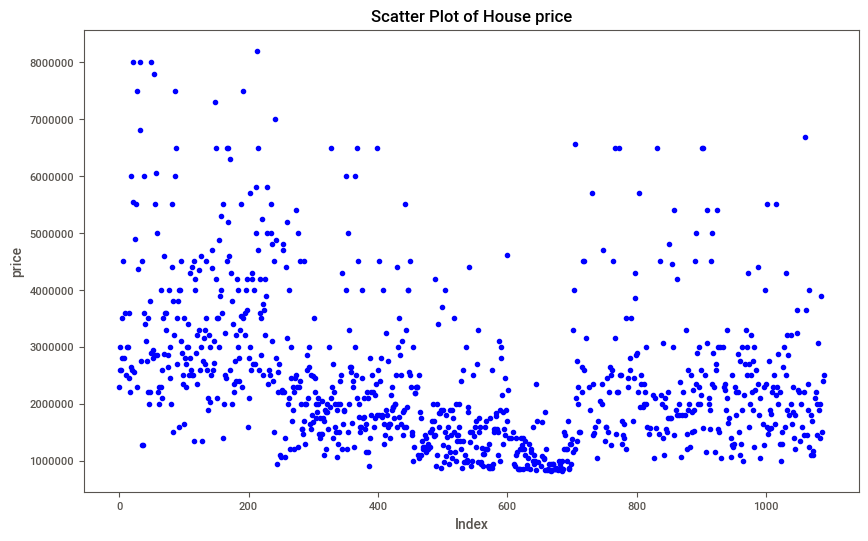

In [1220]:
plt.figure(figsize=(10, 6))
plt.scatter(aqar_df_cleaned.index, aqar_df_cleaned['السعر الاجمالي'], color='blue', marker='o')


plt.title('Scatter Plot of House price')
plt.xlabel('Index')
plt.ylabel('price')


plt.show()

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

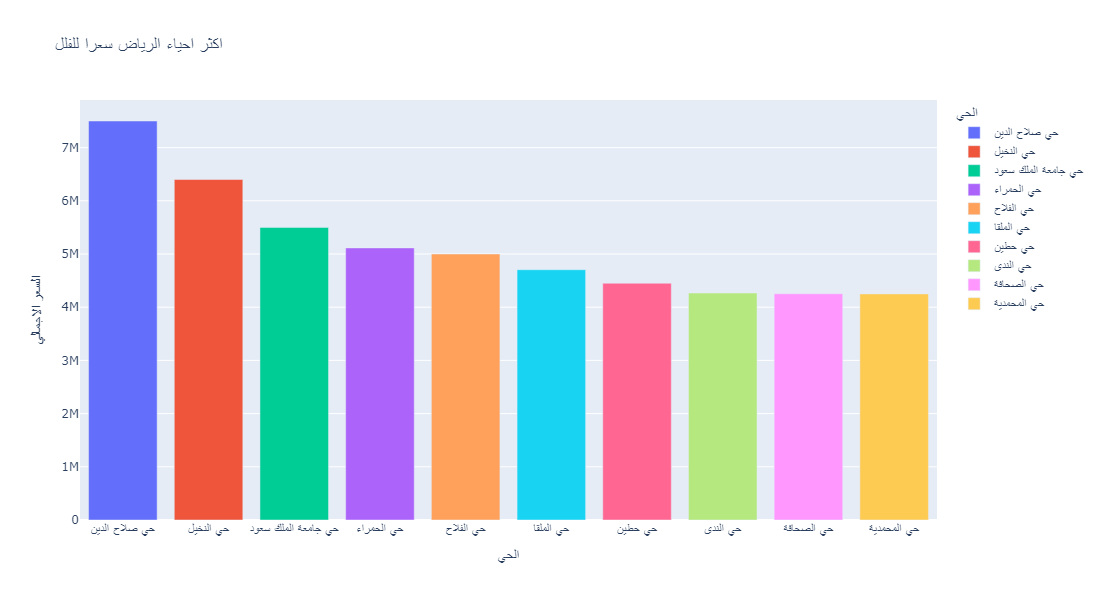

In [1960]:
df_filtered03 = aqar_df_cleaned[(aqar_df_cleaned["الحي"] != "غير معروف") & (aqar_df_cleaned["المنطقة"] != "غير معروف")]


average_price_by_neighbrhood = df_filtered03.groupby("الحي")["السعر الاجمالي"].mean().reset_index()


top_10_neighborhoods2 = average_price_by_neighbrhood.sort_values(by='السعر الاجمالي', ascending=False).head(10)


fig = px.bar(
    top_10_neighborhoods2,
    x="الحي",
    y='السعر الاجمالي',
    title="اكثر احياء الرياض سعرا للفلل",
    color="الحي",
    width=1000,
    height=600
)

fig.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

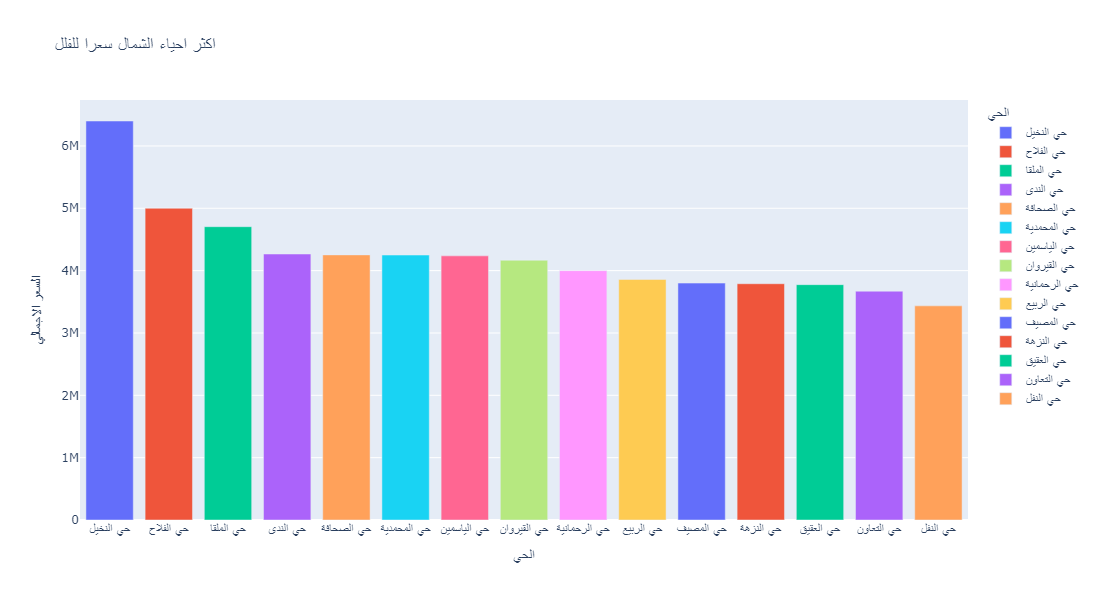

In [1949]:
df_filtered03 = aqar_df_cleaned[(aqar_df_cleaned["الحي"] != "غير معروف") & (aqar_df_cleaned["المنطقة"] == "شمال الرياض")]


average_price_by_neighbrhood = df_filtered03.groupby("الحي")["السعر الاجمالي"].mean().reset_index()


top_10_neighborhoods2 = average_price_by_neighbrhood.sort_values(by='السعر الاجمالي', ascending=False).head(15)


fig = px.bar(
    top_10_neighborhoods2,
    x="الحي",
    y='السعر الاجمالي',
    title="اكثر احياء الشمال سعرا للفلل",
    color="الحي",
    width=1000,
    height=600
)

fig.show()

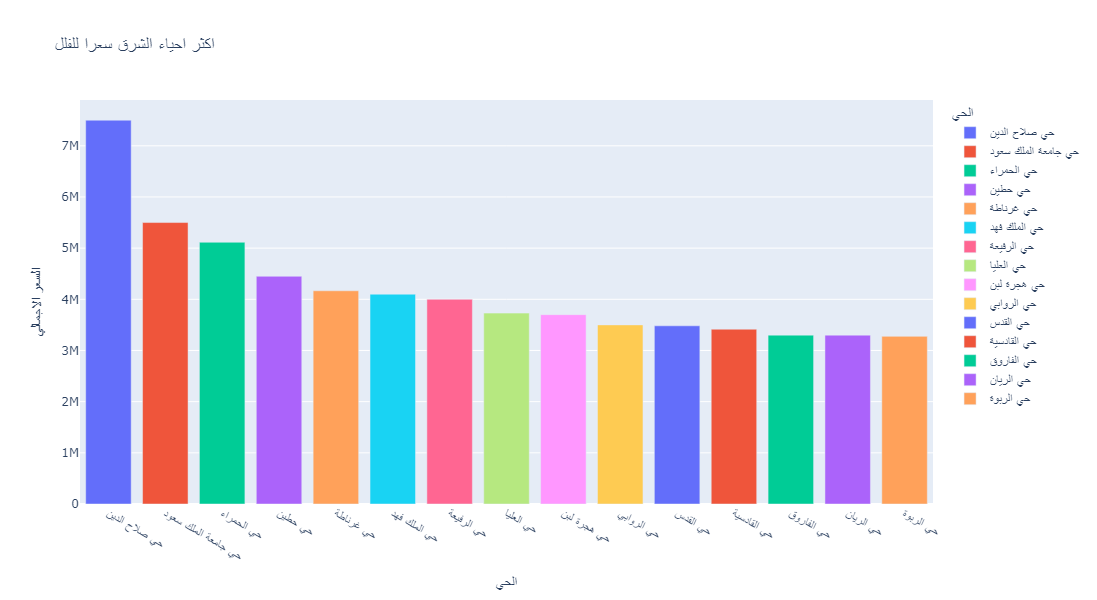

In [1945]:
df_filtered02 = aqar_df_cleaned[(aqar_df_cleaned["الحي"] != "غير معروف") & (aqar_df_cleaned["المنطقة"] == "شرق الرياض")]


average_price_by_neighbrhood = df_filtered02.groupby("الحي")["السعر الاجمالي"].mean().reset_index()


top_10_neighborhoods = average_price_by_neighbrhood.sort_values(by='السعر الاجمالي', ascending=False).head(15)


fig = px.bar(
    top_10_neighborhoods,
    x="الحي",
    y='السعر الاجمالي',
    title="اكثر احياء الشرق سعرا للفلل",
    color="الحي",
    width=1000,
    height=600
)

fig.show()

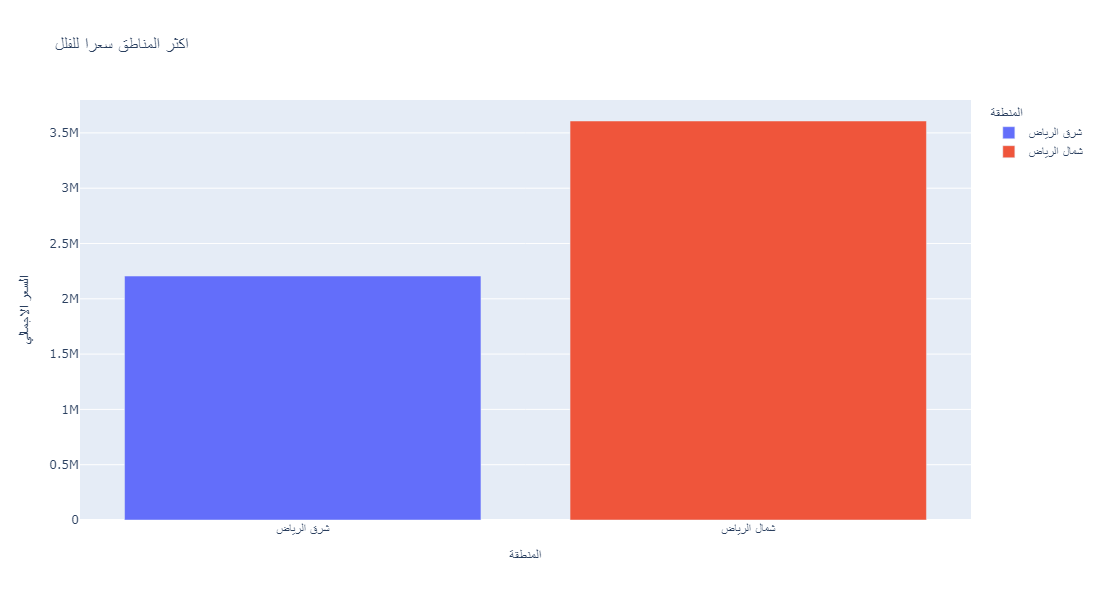

In [1962]:
df_filtered = aqar_df_cleaned[aqar_df_cleaned["المنطقة"] != "غير معروف"]

average_price_by_region = df_filtered.groupby("المنطقة")["السعر الاجمالي"].mean().reset_index()

fig = px.bar(
    average_price_by_region,
    x='المنطقة',
    y='السعر الاجمالي',
    title='اكثر المناطق سعرا للفلل',
    color='المنطقة',
    width=1000,
    height=600 
)

fig.show()